In [43]:
import polars as pl, seaborn as sns, pathlib, ast, sympy

# Day 7

In [2]:
df=pl.read_csv('input/7.txt',has_header=False,separator=':')
df=df.with_columns(pl.col('column_2').str.strip_prefix(' ').str.split(' ')).with_columns(pl.col('column_2').list.len().alias('col2len'))

column_1,column_2,col2len
i64,list[str],u32
7628244,"[""4"", ""6"", … ""321""]",5
1961493912,"[""729"", ""232"", … ""9""]",7
79325232924618,"[""907"", ""466"", … ""618""]",6
5036760,"[""5"", ""647"", … ""8""]",10
152117,"[""5"", ""75"", … ""162""]",6
…,…,…
55225476873,"[""685"", ""1"", … ""873""]",7
1721520,"[""456"", ""6"", … ""797""]",5
1454758,"[""16"", ""96"", … ""50""]",6


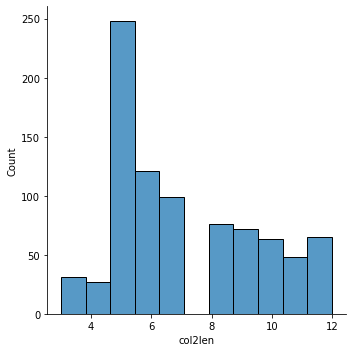

In [3]:
sns.displot(x=df['col2len'])

In [4]:
df['col2len'].max()

12

# Day 9

In [18]:
i=pathlib.Path('input/9.txt').read_text().strip()
len(i),sum(map(int,i))

(19999, 94570)

```
          1         2
0123456789012345678901234567

0099811188827773336446555566
```

In [22]:
ex=[int(e) for e in '0099811188827773336446555566'];

In [25]:
sum(i*ch for i, ch in enumerate(ex))

1928

In [31]:
checksum=0
for i, ch in enumerate(ex):
    checksum+=i*ch
    print(f"{i=} {ch=} {i*ch=} {checksum=}")

i=0 ch=0 i*ch=0 checksum=0
i=1 ch=0 i*ch=0 checksum=0
i=2 ch=9 i*ch=18 checksum=18
i=3 ch=9 i*ch=27 checksum=45
i=4 ch=8 i*ch=32 checksum=77
i=5 ch=1 i*ch=5 checksum=82
i=6 ch=1 i*ch=6 checksum=88
i=7 ch=1 i*ch=7 checksum=95
i=8 ch=8 i*ch=64 checksum=159
i=9 ch=8 i*ch=72 checksum=231
i=10 ch=8 i*ch=80 checksum=311
i=11 ch=2 i*ch=22 checksum=333
i=12 ch=7 i*ch=84 checksum=417
i=13 ch=7 i*ch=91 checksum=508
i=14 ch=7 i*ch=98 checksum=606
i=15 ch=3 i*ch=45 checksum=651
i=16 ch=3 i*ch=48 checksum=699
i=17 ch=3 i*ch=51 checksum=750
i=18 ch=6 i*ch=108 checksum=858
i=19 ch=4 i*ch=76 checksum=934
i=20 ch=4 i*ch=80 checksum=1014
i=21 ch=6 i*ch=126 checksum=1140
i=22 ch=5 i*ch=110 checksum=1250
i=23 ch=5 i*ch=115 checksum=1365
i=24 ch=5 i*ch=120 checksum=1485
i=25 ch=5 i*ch=125 checksum=1610
i=26 ch=6 i*ch=156 checksum=1766
i=27 ch=6 i*ch=162 checksum=1928


## 9b

```
          1
0123456789012345678

2333133121414131402

          1         2         3         4
012345678901234567890123456789012345678901

00...111...2...333.44.5555.6666.777.888899

```

In [6]:
checksum=0
exb="00992111777.44.333....5555.6666.....8888.."
for i, ch in enumerate(exb):
    if ch!='.':
        checksum+=i*int(ch)
        print(f"{i=} {ch=} {i*int(ch)=} {checksum=}")

i=0 ch='0' i*int(ch)=0 checksum=0
i=1 ch='0' i*int(ch)=0 checksum=0
i=2 ch='9' i*int(ch)=18 checksum=18
i=3 ch='9' i*int(ch)=27 checksum=45
i=4 ch='2' i*int(ch)=8 checksum=53
i=5 ch='1' i*int(ch)=5 checksum=58
i=6 ch='1' i*int(ch)=6 checksum=64
i=7 ch='1' i*int(ch)=7 checksum=71
i=8 ch='7' i*int(ch)=56 checksum=127
i=9 ch='7' i*int(ch)=63 checksum=190
i=10 ch='7' i*int(ch)=70 checksum=260
i=12 ch='4' i*int(ch)=48 checksum=308
i=13 ch='4' i*int(ch)=52 checksum=360
i=15 ch='3' i*int(ch)=45 checksum=405
i=16 ch='3' i*int(ch)=48 checksum=453
i=17 ch='3' i*int(ch)=51 checksum=504
i=22 ch='5' i*int(ch)=110 checksum=614
i=23 ch='5' i*int(ch)=115 checksum=729
i=24 ch='5' i*int(ch)=120 checksum=849
i=25 ch='5' i*int(ch)=125 checksum=974
i=27 ch='6' i*int(ch)=162 checksum=1136
i=28 ch='6' i*int(ch)=168 checksum=1304
i=29 ch='6' i*int(ch)=174 checksum=1478
i=30 ch='6' i*int(ch)=180 checksum=1658
i=36 ch='8' i*int(ch)=288 checksum=1946
i=37 ch='8' i*int(ch)=296 checksum=2242
i=38 ch='8' i*int(ch)=

# Day 11

In [4]:
df=pl.read_csv('input/11a.out',has_header=False,separator=';')
df=df.with_columns(pl.col('column_3').map_elements(ast.literal_eval,return_dtype=pl.List(pl.Int64)))

column_1,column_2,column_3
i64,i64,list[i64]
0,1,[112]
1,1,[226688]
2,2,"[226, 688]"
3,2,"[457424, 1392512]"
4,3,"[457, 424, 2818444288]"
…,…,…
22,10042,"[24579456, 2024, … 9456]"
23,14715,"[2457, 9456, … 56]"
24,22990,"[24, 57, … 6]"


In [5]:
(df['column_3'].list.len()==df['column_2']).all()

True

In [6]:
df25=df.filter(pl.col('column_1')==25)

column_1,column_2,column_3
i64,i64,list[i64]
25,14988,"[16192, 1, … 16192]"
25,45297,"[4048, 8096, … 12144]"
25,23568,"[32772608, 2024, … 16192]"
25,19778,"[40, 48, … 9456]"
25,7610,"[32, 77, … 16192]"
25,12120,"[16192, 1, … 56]"
25,25793,"[6072, 4048, … 24579456]"
25,34466,"[2, 4, … 12144]"


In [8]:
df25cnt=df25['column_3'].explode().value_counts(sort=True)

column_3,count
i64,u32
8,9756
4,9708
2,9140
0,9099
6,7802
…,…
49167008,1
140805632,1
14,1


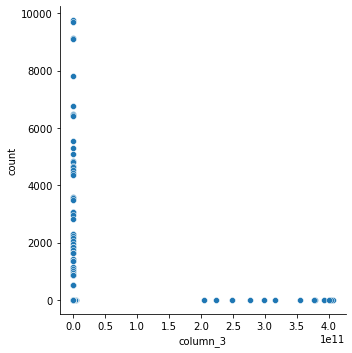

In [11]:
sns.relplot(data=df25cnt,x='column_3',y='count')

# Day 13

$$
\begin{align*}
    a \cdot a_x + b \cdot b_x &= p_x \tag{1} \\
    a \cdot a_y + b \cdot b_y &= p_y \tag{2} \\
    a &= \frac{p_x - b \cdot b_x}{a_x} \tag{1a} \\
    \frac{(p_x - b \cdot b_x) \cdot a_y}{a_x} + b \cdot b_y &= p_y \tag{1a,2} \\
    \frac{p_x \cdot a_y}{a_x} - b \cdot \frac{b_x \cdot a_y}{a_x} + b \cdot b_y &= p_y \\
    b \cdot \left(b_y - \frac{b_x \cdot a_y}{a_x}\right) &= p_y - \frac{p_x \cdot a_y}{a_x} \\
    b &= \frac{p_y - \frac{p_x \cdot a_y}{a_x}}{b_y - \frac{b_x \cdot a_y}{a_x}} \\
    b &= \frac{a_x \cdot p_y - p_x \cdot a_y}{a_x \cdot b_y - b_x \cdot a_y}
\end{align*}
$$

In [52]:
ax,ay,bx,by,px,py,a,b=sympy.symbols('a_x a_y b_x b_y p_x p_y a b')

In [53]:
sols=sympy.solve([a*ax + b*bx - px, a*ay + b*by - py],a,b)

{a: (-b_x*p_y + b_y*p_x)/(a_x*b_y - a_y*b_x),
 b: (a_x*p_y - a_y*p_x)/(a_x*b_y - a_y*b_x)}

In [54]:
sols[a]

(-b_x*p_y + b_y*p_x)/(a_x*b_y - a_y*b_x)

In [55]:
sols[b]

(a_x*p_y - a_y*p_x)/(a_x*b_y - a_y*b_x)

# Day 17

Register A: 30899381<br>
Register B: 0<br>
Register C: 0<br>

Program: 2,4,1,1,7,5,4,0,0,3,1,6,5,5,3,0

```
2,4  bst A     b=a%8
1,1  bxl B     xor b,1
7,5  cdv b     c=a/2**b
4,0  bxc       b^=C
0,3  adv 3     a/=8
1,6  bxl 6     b^=6
5,5  out b     out B%8
3,0  jnz 0     jnz 0
```

In [64]:
a=30899381
while True:
    b=a%8         # take 3 LSB bits if A
    b^=1          # flip bit 0
    c=a//2**b     # shift a by b bits?
    b^=c          # flip by lsb of c
    a//=8         # shift A right 3 bits
    b^=6          # flip bit 1&2
    print(b%8)
    if a==0: break

1
6
3
6
5
6
5
1
7


In [97]:
a=30899381
while True:
    print(f'a          {bin(a)[2:]:>30}')
    b=a%8         # take 3 LSB bits if A
    print(f'b=a%8      {bin(b)[2:]:>30}')
    b^=1          # flip bit 0
    print(f'b^=1       {bin(b)[2:]:>30}')
    c=a//2**b     # 
    print(f'c=a//2**b  {bin(c)[2:]:>30}')
    b^=c          # 
    print(f'b^=c       {bin(b)[2:]:>30}')
    a//=8         # shift A right 3 bits
    print(f'a//=8      {bin(a)[2:]:>30}')
    b^=6          # flip bit 1&2
    print(f'b^=6 out b%8 -------------------------- {b%8:>}')
    if a==0: break

a               1110101110111110010110101
b=a%8                                 101
b^=1                                  100
c=a//2**b           111010111011111001011
b^=c                111010111011111001111
a//=8              1110101110111110010110
b^=6 out b%8 -------------------------- 1
a                  1110101110111110010110
b=a%8                                 110
b^=1                                  111
c=a//2**b                 111010111011111
b^=c                      111010111011000
a//=8                 1110101110111110010
b^=6 out b%8 -------------------------- 6
a                     1110101110111110010
b=a%8                                  10
b^=1                                   11
c=a//2**b                1110101110111110
b^=c                     1110101110111101
a//=8                    1110101110111110
b^=6 out b%8 -------------------------- 3
a                        1110101110111110
b=a%8                                 110
b^=1                              

In [ ]:
b=7
a=0

b^=6
#a = 001..111
b = prevb xor c ==> c = ?, prevb=?


# Day 20

In [106]:
sum(int(l.split()[2]) for l in """There are 32 cheats that save 50 picoseconds.
There are 31 cheats that save 52 picoseconds.
There are 29 cheats that save 54 picoseconds.
There are 39 cheats that save 56 picoseconds.
There are 25 cheats that save 58 picoseconds.
There are 23 cheats that save 60 picoseconds.
There are 20 cheats that save 62 picoseconds.
There are 19 cheats that save 64 picoseconds.
There are 12 cheats that save 66 picoseconds.
There are 14 cheats that save 68 picoseconds.
There are 12 cheats that save 70 picoseconds.
There are 22 cheats that save 72 picoseconds.
There are 4 cheats that save 74 picoseconds.
There are 3 cheats that save 76 picoseconds.""".splitlines())

285

# Day 22

In [113]:
n=123
s1 = (n ^ n*64)% 16777216

7867

In [114]:
s2 = (s1 ^ s1//32) % 16777216

7758

In [116]:
s3 = (s2 ^ s2 * 2048) % 16777216

15887950